In [204]:
import pandas as pd

In [205]:
house_sales_df = pd.read_csv("house_sales.csv",encoding='utf-8')

In [206]:
house_sales_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [207]:
house_sales_df['total_sqf'] = house_sales_df['sqft_above'] + house_sales_df['sqft_basement']

In [208]:
house_sales_df[['price','bedrooms','bathrooms','total_sqf','floors','sqft_lot','sqft_living15','sqft_lot15']]

,price,bedrooms,bathrooms,total_sqf,floors,sqft_lot,sqft_living15,sqft_lot15
0,221900.0,3.0,1.00,1180,1.0,5650.0,1340,5650
1,538000.0,3.0,2.25,2570,2.0,7242.0,1690,7639
2,180000.0,2.0,1.00,770,1.0,10000.0,2720,8062
3,604000.0,4.0,3.00,1960,1.0,5000.0,1360,5000
4,510000.0,3.0,2.00,1680,1.0,8080.0,1800,7503
...,...,...,...,...,...,...,...,...
21608,360000.0,3.0,2.50,1530,3.0,1131.0,1530,1509
21609,400000.0,4.0,2.50,2310,2.0,5813.0,1830,7200
21610,402101.0,2.0,0.75,1020,2.0,1350.0,1020,2007
21611,400000.0,3.0,2.50,1600,2.0,2388.0,1410,1287


In [209]:
house_sales_df[house_sales_df['bedrooms'].isna()][['price','bedrooms','bathrooms','total_sqf','floors','sqft_lot']]

,price,bedrooms,bathrooms,total_sqf,floors,sqft_lot
18,189000.0,NaN,1.00,1200,1.0,9850.0
23,252700.0,NaN,1.50,1070,1.0,NaN
31,280000.0,NaN,1.50,1190,3.0,1265.0
32,687500.0,NaN,1.75,2330,1.5,5000.0
46,210490.0,NaN,1.00,990,1.0,8528.0
...,...,...,...,...,...,...
21498,610000.0,NaN,1.75,1630,3.0,1500.0
21505,1555000.0,NaN,3.50,4360,2.0,6240.0
21523,579950.0,NaN,2.75,2460,2.0,8643.0
21565,341780.0,NaN,2.75,2260,2.0,NaN


# hs_bbb_df 

Here we create a dataframe, a subset of **house_sales_df** to experiment with. 

In [210]:
hs_bbb_df = house_sales_df[house_sales_df['bedrooms'].notnull()][['price','bedrooms','bathrooms','total_sqf', 'zipcode']]
hs_bbb_df

,price,bedrooms,bathrooms,total_sqf,zipcode
0,221900.0,3.0,1.00,1180,98178
1,538000.0,3.0,2.25,2570,98125
2,180000.0,2.0,1.00,770,98028
3,604000.0,4.0,3.00,1960,98136
4,510000.0,3.0,2.00,1680,98074
...,...,...,...,...,...
21608,360000.0,3.0,2.50,1530,98103
21609,400000.0,4.0,2.50,2310,98146
21610,402101.0,2.0,0.75,1020,98144
21611,400000.0,3.0,2.50,1600,98027


In [211]:
hs_bbb_df.corr(method='kendall')

,price,bedrooms,bathrooms,total_sqf,zipcode
price,1.000000,0.265942,0.370688,0.463475,-0.009424
bedrooms,0.265942,1.000000,0.440626,0.521796,-0.128799
bathrooms,0.370688,0.440626,1.000000,0.588825,-0.144641
total_sqf,0.463475,0.521796,0.588825,1.000000,-0.137603
zipcode,-0.009424,-0.128799,-0.144641,-0.137603,1.000000


In [212]:
import matplotlib.pyplot as plt

# stats module and missing data
- [missing data](https://www.statsmodels.org/devel/missing.html)

```
missing:

Available options are ‘none’, ‘drop’, and ‘raise’. If ‘none’, no nan checking is done. If ‘drop’, any observations with nans are dropped. If ‘raise’, an error is raised. Default is ‘none’.
```

In [213]:
import numpy as np
import statsmodels.api as sm
import seaborn as sns

# Bathrooms visavis Bedrooms

Text(0, 0.5, 'bedrooms')

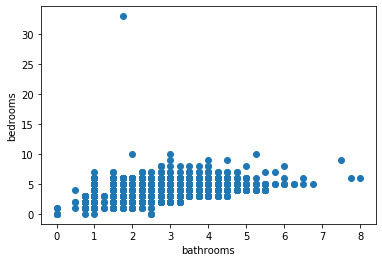

In [214]:
x = hs_bbb_df.bathrooms
y = hs_bbb_df.bedrooms
plt.scatter(x,y)
plt.xlabel('bathrooms')
plt.ylabel('bedrooms')

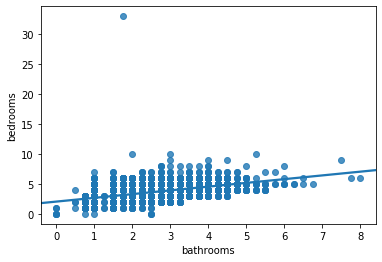

In [215]:
sns.regplot(x="bathrooms", y="bedrooms", data=hs_bbb_df);

In [216]:
y = hs_bbb_df.bedrooms
X = hs_bbb_df.bathrooms
X = sm.add_constant(X)
lr_model = sm.OLS(y, X, missing='drop').fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:               bedrooms   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     7057.
Date:                Sun, 04 Apr 2021   Prob (F-statistic):               0.00
Time:                        22:21:24   Log-Likelihood:                -23236.
No. Observations:               19470   AIC:                         4.648e+04
Df Residuals:                   19468   BIC:                         4.649e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0519      0.017    122.616      0.0

/root/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# Square feet visavis Bedrooms

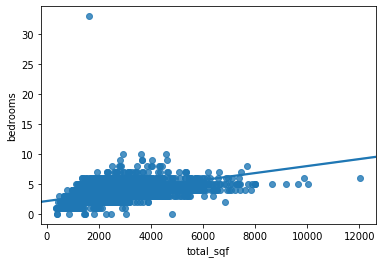

In [217]:
sns.regplot(x="total_sqf", y="bedrooms", data=hs_bbb_df);

In [218]:
y = hs_bbb_df.bedrooms
X = hs_bbb_df.total_sqf
X = sm.add_constant(X)
lr_model = sm.OLS(y, X, missing='drop').fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:               bedrooms   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                 1.022e+04
Date:                Sun, 04 Apr 2021   Prob (F-statistic):               0.00
Time:                        22:21:49   Log-Likelihood:                -23442.
No. Observations:               20479   AIC:                         4.689e+04
Df Residuals:                   20477   BIC:                         4.690e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1571      0.013    164.075      0.0

/root/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# Price visavis Bedrooms

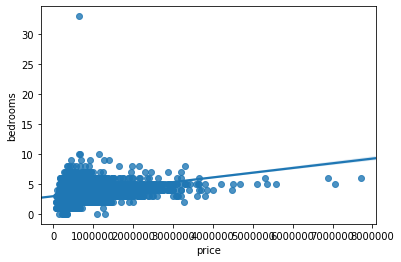

In [219]:
sns.regplot(x="price", y="bedrooms", data=hs_bbb_df);

In [220]:
y = hs_bbb_df.bedrooms
X = hs_bbb_df.price
X = sm.add_constant(X)
lr_model = sm.OLS(y, X, missing='drop').fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:               bedrooms   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     2190.
Date:                Sun, 04 Apr 2021   Prob (F-statistic):               0.00
Time:                        22:21:54   Log-Likelihood:                -26547.
No. Observations:               20479   AIC:                         5.310e+04
Df Residuals:                   20477   BIC:                         5.311e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9482      0.011    268.531      0.0

# (bathrooms + total square feet)  visavis  Bedrooms

In [221]:
y = hs_bbb_df.bedrooms
X = hs_bbb_df[['bathrooms','total_sqf']]
X = sm.add_constant(X)
lr_model = sm.OLS(y, X, missing='drop').fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:               bedrooms   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     5184.
Date:                Sun, 04 Apr 2021   Prob (F-statistic):               0.00
Time:                        22:21:54   Log-Likelihood:                -22091.
No. Observations:               19470   AIC:                         4.419e+04
Df Residuals:                   19467   BIC:                         4.421e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9755      0.016    124.602      0.0

In [222]:
print(lr_model.params)

const        1.975536
bathrooms    0.226841
total_sqf    0.000441
dtype: float64


In [223]:
from mpl_toolkits.mplot3d import Axes3D

In [224]:
X_axis, Y_axis = np.meshgrid(np.linspace(X.bathrooms.min(),X.bathrooms.max(),100),np.linspace(X.total_sqf.min(),X.total_sqf.max(),100) )

In [225]:
Z_axis = lr_model.params[0] + lr_model.params[1] * X_axis + lr_model.params[2] * Y_axis

Text(0.5, 0, 'bedrooms')

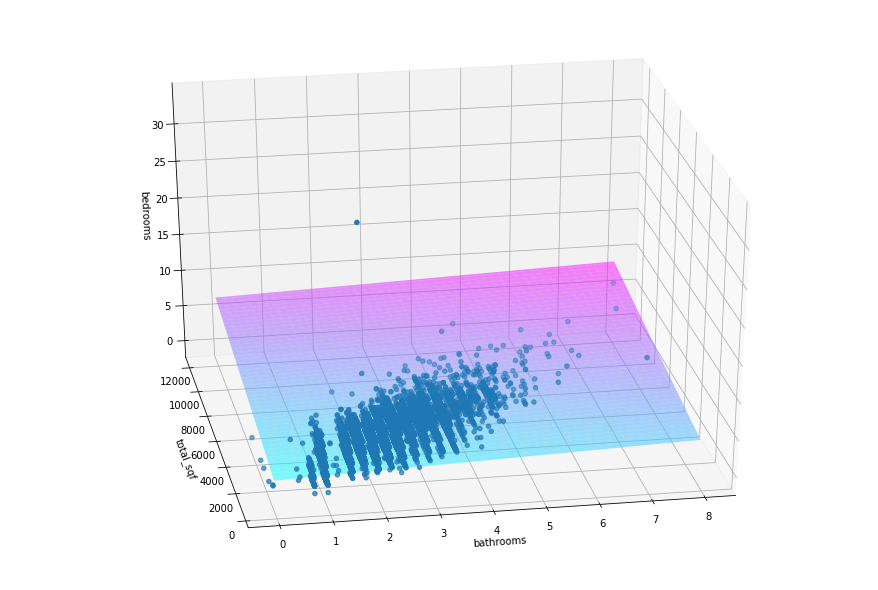

In [226]:
# build the 3d space and plane
fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig, azim = -100)
ax.plot_surface(X_axis, Y_axis, Z_axis, cmap = plt.cm.cool, alpha=0.5, linewidth=0)

# plot the values
ax.scatter(X.bathrooms,X.total_sqf, y)

# add labels
ax.set_xlabel('bathrooms')
ax.set_ylabel('total_sqf')
ax.set_zlabel('bedrooms')

Text(0.5, 0, 'bedrooms')

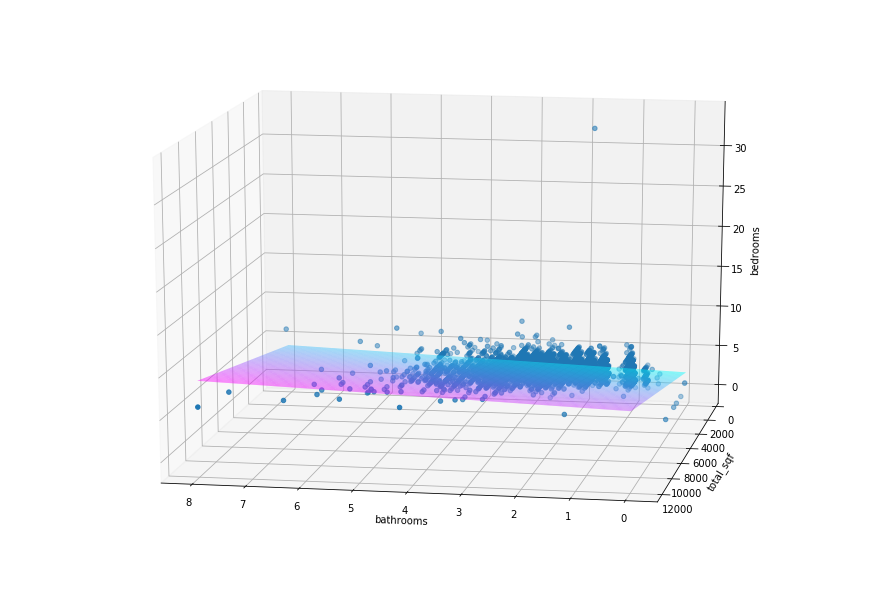

In [227]:
# build the 3d space and plane
fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig,  azim = 100, elev=15.)
ax.plot_surface(X_axis, Y_axis, Z_axis, cmap = plt.cm.cool, alpha=0.5, linewidth=0)

# plot the values
ax.scatter(X.bathrooms,X.total_sqf, y)

# add labels
ax.set_xlabel('bathrooms')
ax.set_ylabel('total_sqf')
ax.set_zlabel('bedrooms')

In [228]:
ypredict = lr_model.predict(X)
print(ypredict)

0        2.722994
1        3.619814
2        2.542101
3        3.520812
4        3.170435
           ...   
21608    3.217675
21609    3.561812
21610    2.595691
21611    3.248559
21612    2.595691
Length: 20479, dtype: float64


In [229]:
hs_bbb_df['predict_bedrooms'] = round(lr_model.predict(X),0)

In [230]:
hs_bbb_df['delta_bedrooms'] = hs_bbb_df['bedrooms'] - hs_bbb_df['predict_bedrooms']

# Predicted versus actuall bedrooms

To cuantify how well our model predicts the number of bedrooms, we calculate the difference between the preducted and actual number of bedrooms in the observations where we have both, we call that delta. Then we perform the following :
- calculate descriptive statistics on the delta
- plot a histogram

In [231]:
hs_bbb_delta_df = hs_bbb_df[hs_bbb_df['bedrooms'] != 0]

In [232]:
hs_bbb_delta_df[['bedrooms','predict_bedrooms','delta_bedrooms']]

,bedrooms,predict_bedrooms,delta_bedrooms
0,3.0,3.0,0.0
1,3.0,4.0,-1.0
2,2.0,3.0,-1.0
3,4.0,4.0,0.0
4,3.0,3.0,0.0
...,...,...,...
21608,3.0,3.0,0.0
21609,4.0,4.0,0.0
21610,2.0,3.0,-1.0
21611,3.0,3.0,0.0


In [233]:
hs_bbb_delta_df['delta_bedrooms'].describe()

count    19461.000000
mean        -0.015775
std          0.812485
min         -3.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         30.000000
Name: delta_bedrooms, dtype: float64

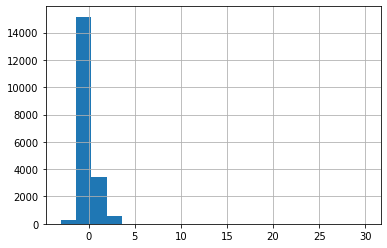

In [234]:
hs_bbb_delta_df['delta_bedrooms'].hist(bins=20)

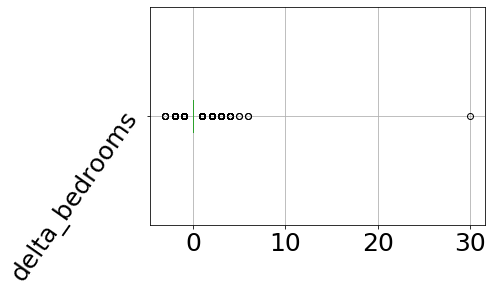

In [235]:

hs_bbb_delta_df.boxplot(column=['delta_bedrooms'], vert=False, rot=55,fontsize=25)

In [236]:
hs_bbb_df[hs_bbb_df['bedrooms'] == 0]

,price,bedrooms,bathrooms,total_sqf,zipcode,predict_bedrooms,delta_bedrooms
875,1095000.0,0.0,0.00,3064,98102,3.0,-3.0
3467,288000.0,0.0,NaN,1430,98125,NaN,NaN
4868,228000.0,0.0,1.00,390,98118,2.0,-2.0
6994,1295650.0,0.0,0.00,4810,98053,4.0,-4.0
8477,339950.0,0.0,2.50,2290,98042,4.0,-4.0
8484,240000.0,0.0,2.50,1810,98038,3.0,-3.0
9773,355000.0,0.0,0.00,2460,98031,3.0,-3.0
9854,235000.0,0.0,0.00,1470,98065,3.0,-3.0
12653,320000.0,0.0,2.50,1490,98065,3.0,-3.0
14423,139950.0,0.0,NaN,844,98001,NaN,NaN


In [237]:
hs_bbb_df.loc[hs_bbb_df.bedrooms == 0 , 'bedrooms'] = hs_bbb_df['predict_bedrooms']

In [238]:
hs_bbb_df[hs_bbb_df['bedrooms'] == 0]

,price,bedrooms,bathrooms,total_sqf,zipcode,predict_bedrooms,delta_bedrooms


# Conclusion about the bedroom predictor model

Based on the histogram and boxplot of the **bedroom_delta** series, and a **P value** of **0.000**. We have high confidence in this model to predict the number of bedrooms.

Now we perform the same steps in the original data frame: **house_sales_df**

In [239]:
y = house_sales_df.bedrooms
X = house_sales_df[['bathrooms','total_sqf']]
X = sm.add_constant(X)
lr_model = sm.OLS(y, X, missing='drop').fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:               bedrooms   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     5184.
Date:                Sun, 04 Apr 2021   Prob (F-statistic):               0.00
Time:                        22:22:32   Log-Likelihood:                -22091.
No. Observations:               19470   AIC:                         4.419e+04
Df Residuals:                   19467   BIC:                         4.421e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9755      0.016    124.602      0.0

/root/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [240]:
house_sales_df['predict_bedrooms'] = round(lr_model.predict(X),0)

In [241]:
house_sales_df[house_sales_df['bedrooms'] == 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,total_sqf,predict_bedrooms
875,6306400140,20140612T000000,1095000.0,0.0,0.00,3064.0,4764.0,3.5,0,2,...,0,1990,0,98102,47.6362,-122.322,2360,4000,3064,3.0
3467,1453602309,20140805T000000,288000.0,0.0,NaN,1430.0,1650.0,3.0,0,0,...,0,1999,0,98125,47.7222,-122.290,1430,1650,1430,NaN
4868,6896300380,20141002T000000,228000.0,0.0,1.00,390.0,5900.0,1.0,0,0,...,0,1953,0,98118,47.5260,-122.261,2170,6000,390,2.0
6994,2954400190,20140624T000000,1295650.0,0.0,0.00,4810.0,28008.0,2.0,0,0,...,0,1990,0,98053,47.6642,-122.069,4740,35061,4810,4.0
8477,2569500210,20141117T000000,339950.0,0.0,2.50,2290.0,8319.0,2.0,0,0,...,0,1985,0,98042,47.3473,-122.151,2500,8751,2290,4.0
8484,2310060040,20140925T000000,240000.0,0.0,2.50,1810.0,5669.0,2.0,0,0,...,0,2003,0,98038,47.3493,-122.053,1810,5685,1810,3.0
9773,3374500520,20150429T000000,355000.0,0.0,0.00,2460.0,8049.0,2.0,0,0,...,0,1990,0,98031,47.4095,-122.168,2520,8050,2460,3.0
9854,7849202190,20141223T000000,235000.0,0.0,0.00,1470.0,4800.0,2.0,0,0,...,0,1996,0,98065,47.5265,-121.828,1060,7200,1470,3.0
12653,7849202299,20150218T000000,320000.0,0.0,2.50,1490.0,7111.0,2.0,0,0,...,0,1999,0,98065,47.5261,-121.826,1500,4675,1490,3.0
14423,9543000205,20150413T000000,139950.0,0.0,NaN,844.0,4269.0,1.0,0,0,...,0,1913,0,98001,47.2781,-122.250,1380,9600,844,NaN


In [242]:
house_sales_df.loc[house_sales_df.bedrooms == 0 , 'bedrooms'] = house_sales_df['predict_bedrooms']

In [243]:
house_sales_df[house_sales_df['bedrooms'] == 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,total_sqf,predict_bedrooms


# Bathrooms

Since we found that there is a modestly robust correlation between **bedrooms** and **bathrooms**, which is enhaced with the preditor variable of **total_sqf**, we will apply a similar predictor model from **bathrooms**.

In [244]:
y = house_sales_df.bathrooms
X = house_sales_df[['bedrooms','total_sqf']]
X = sm.add_constant(X)
lr_model = sm.OLS(y, X, missing='drop').fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:              bathrooms   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                 1.341e+04
Date:                Sun, 04 Apr 2021   Prob (F-statistic):               0.00
Time:                        22:22:39   Log-Likelihood:                -14072.
No. Observations:               19470   AIC:                         2.815e+04
Df Residuals:                   19467   BIC:                         2.817e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5886      0.013     43.668      0.0

In [245]:
house_sales_df['predict_bathrooms'] = round(lr_model.predict(X),1)

In [246]:
house_sales_df['predict_bathrooms'].head()

0    1.6
1    2.4
2    1.2
3    2.1
4    1.8
Name: predict_bathrooms, dtype: float64

## There is one more step
since bathrooms are either whole numbers or a number and a half we need to perform one more step:

In [247]:
house_sales_df.loc[(house_sales_df.predict_bathrooms - np.fix(house_sales_df.predict_bathrooms)) != 0.5 , 'predict_bathrooms'] = round(house_sales_df.predict_bathrooms,0)

In [248]:
house_sales_df['delta_bathrooms'] = house_sales_df['bathrooms'] - house_sales_df['predict_bathrooms']

In [249]:
house_sales_bath_delta_df = house_sales_df[house_sales_df['bathrooms'] != 0]

In [250]:
house_sales_bath_delta_df['delta_bathrooms'].describe()

count    19464.000000
mean        -0.014321
std          0.546592
min         -3.250000
25%         -0.500000
50%          0.000000
75%          0.500000
max          3.500000
Name: delta_bathrooms, dtype: float64

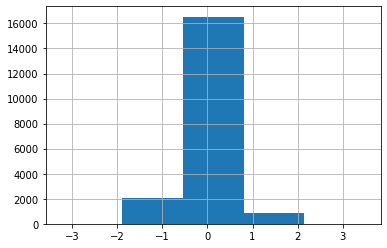

In [251]:
house_sales_bath_delta_df['delta_bathrooms'].hist(bins=5)

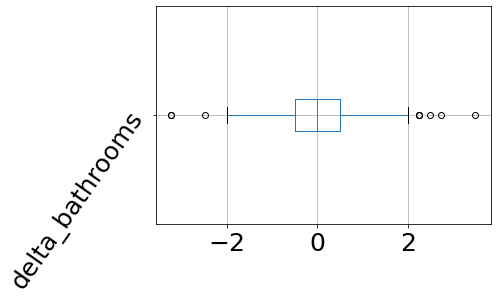

In [252]:
house_sales_bath_delta_df.boxplot(column=['delta_bathrooms'], vert=False, rot=55,fontsize=25)

## Conclusion about the bathroom predictor model

Comparing the differences we get between the predicted and actual number of bathrooms we notice a very similar distribution as that of the beadrooms prediction model. We also have a highg confidence in this model, for the same reasons as we do for the bedroom prediction model.

In [253]:
house_sales_df[house_sales_df['bathrooms'] == 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,total_sqf,predict_bedrooms,predict_bathrooms,delta_bathrooms
875,6306400140,20140612T000000,1095000.0,3.0,0.0,3064.0,4764.0,3.5,0,2,...,0,98102,47.6362,-122.322,2360,4000,3064,3.0,3.0,-3.0
1149,3421079032,20150217T000000,75000.0,1.0,0.0,670.0,43377.0,1.0,0,0,...,0,98022,47.2638,-121.906,1160,42882,670,2.0,1.0,-1.0
3119,3918400017,20150205T000000,380000.0,NaN,0.0,1470.0,979.0,3.0,0,2,...,0,98133,47.7145,-122.356,1470,1399,1470,3.0,NaN,NaN
5832,5702500050,20141104T000000,280000.0,1.0,0.0,600.0,24501.0,1.0,0,0,...,0,98045,47.5316,-121.749,990,22549,600,2.0,1.0,-1.0
6994,2954400190,20140624T000000,1295650.0,4.0,0.0,4810.0,28008.0,2.0,0,0,...,0,98053,47.6642,-122.069,4740,35061,4810,4.0,4.0,-4.0
9773,3374500520,20150429T000000,355000.0,3.0,0.0,2460.0,8049.0,2.0,0,0,...,0,98031,47.4095,-122.168,2520,8050,2460,3.0,2.0,-2.0
9854,7849202190,20141223T000000,235000.0,3.0,0.0,1470.0,4800.0,2.0,0,0,...,0,98065,47.5265,-121.828,1060,7200,1470,3.0,2.0,-2.0
19452,3980300371,20140926T000000,142000.0,NaN,0.0,290.0,20875.0,1.0,0,0,...,0,98024,47.5308,-121.888,1620,22850,290,2.0,NaN,NaN


In [254]:
house_sales_df.loc[house_sales_df.bathrooms == 0 , 'bathrooms'] = house_sales_df['predict_bathrooms']

In [255]:
house_sales_df[house_sales_df['bathrooms'] == 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,total_sqf,predict_bedrooms,predict_bathrooms,delta_bathrooms
